**INFORME ESTADÍSTICO** 

**Jeferson Hernandez Garzon**


In [16]:
println("╔══════════════════════════════════════════════════════════════╗")
println("║                                                              ║")
println("║                   TALLER DE ESTADÍSTICA                      ║")
println("║                                                              ║")
println("║                 ANÁLISIS DESCRIPTIVO                         ║")
println("║                 DE TRES VARIABLES                            ║")
println("║                                                              ║")
println("║   • Variable discreta: Número de hijos                       ║")
println("║   • Variable continua: Ingreso mensual                       ║")
println("║   • Variable cualitativa: Nivel educativo                    ║")
println("║                                                              ║")
println("║   Muestra: 150 familias                                      ║")
println("║   Semilla: 286858 (resultados reproducibles)                 ║")
println("║                                                              ║")
println("╚══════════════════════════════════════════════════════════════╝")

╔══════════════════════════════════════════════════════════════╗
║                                                              ║
║                   TALLER DE ESTADÍSTICA                      ║
║                                                              ║
║                 ANÁLISIS DESCRIPTIVO                         ║
║                 DE TRES VARIABLES                            ║
║                                                              ║
║   • Variable discreta: Número de hijos                       ║
║   • Variable continua: Ingreso mensual                       ║
║   • Variable cualitativa: Nivel educativo                    ║
║                                                              ║
║   Muestra: 150 familias                                      ║
║   Semilla: 286858 (resultados reproducibles)                 ║
║                                                              ║
╚══════════════════════════════════════════════════════════════╝


In [1]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("Distributions")
Pkg.add("Statistics")
Pkg.add("Plots")
Pkg.add("FreqTables")
using DataFrames 
using Distributions
using Statistics
using Plots
using FreqTables
using Random


    Updating registry at `C:\Users\Stiven-PC\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Stiven-PC\.julia\environments\v1.10\Manifest

In [ ]:
Random.seed!(2387491)


TaskLocalRNG()

In [3]:
n = 150
dist_discreta = DiscreteUniform(0, 5)
hijos_familia = rand(dist_discreta, n)
dist_continua = Uniform(500, 5000)
ingreso_mensual = rand(dist_continua, n)
niveles_educativos = ["Sin estudios", "Primaria", "Secundaria", "Universidad", "Posgrado"]
nivel_educativo = rand(niveles_educativos, n)

150-element Vector{String}:
 "Sin estudios"
 "Universidad"
 "Primaria"
 "Sin estudios"
 "Sin estudios"
 "Universidad"
 "Secundaria"
 "Universidad"
 "Universidad"
 "Primaria"
 "Posgrado"
 "Secundaria"
 "Posgrado"
 ⋮
 "Secundaria"
 "Secundaria"
 "Secundaria"
 "Secundaria"
 "Posgrado"
 "Posgrado"
 "Posgrado"
 "Sin estudios"
 "Posgrado"
 "Universidad"
 "Sin estudios"
 "Primaria"

In [17]:
println("┌──────────────────────────────────────────────────────────────┐")
println("│                                                              │")
println("│                  INFORME ESTADÍSTICO                         │")
println("│                                                              │")
println("│  📊 Análisis descriptivo completo                            │")
println("│  📈 Gráficos y medidas estadísticas                          │")
println("│  📋 Interpretación de resultados                             │")
println("│                                                              │")
println("│  Variables analizadas:                                       │")
println("│    • Cantidad de hijos por familia                           │")
println("│    • Ingreso económico mensual                               │")
println("│    • Nivel educativo alcanzado                               │")
println("│                                                              │")
println("└──────────────────────────────────────────────────────────────┘")

┌──────────────────────────────────────────────────────────────┐
│                                                              │
│                  INFORME ESTADÍSTICO                         │
│                                                              │
│  📊 Análisis descriptivo completo                            │
│  📈 Gráficos y medidas estadísticas                          │
│  📋 Interpretación de resultados                             │
│                                                              │
│  Variables analizadas:                                       │
│    • Cantidad de hijos por familia                           │
│    • Ingreso económico mensual                               │
│    • Nivel educativo alcanzado                               │
│                                                              │
└──────────────────────────────────────────────────────────────┘


In [4]:
df = DataFrame(
    hijos = hijos_familia,
    ingreso = ingreso_mensual,
    educacion = nivel_educativo
)
println("=== DATOS GENERADOS ===")
println(first(df, 10))


=== DATOS GENERADOS ===
10×3 DataFrame
 Row │ hijos  ingreso   educacion    
     │ Int64  Float64   String       
─────┼───────────────────────────────
   1 │     5  3293.98   Sin estudios
   2 │     1   647.339  Universidad
   3 │     1  4325.89   Primaria
   4 │     3   615.022  Sin estudios
   5 │     0  4830.64   Sin estudios
   6 │     2  1478.46   Universidad
   7 │     5  2826.91   Secundaria
   8 │     5  4736.48   Universidad
   9 │     1  1713.31   Universidad
  10 │     5  3282.78   Primaria


In [5]:
function calcular_moda(data)
    freq = freqtable(data)
    max_freq = maximum(values(freq))
    modas = [k for (k, v) in freq if v == max_freq]
    return length(modas) == 1 ? modas[1] : join(modas, ", ")
end

calcular_moda (generic function with 1 method)

In [6]:
function calcular_moda(data)
    freq = freqtable(data)
    max_freq = maximum(values(freq))
    modas = [k for (k, v) in freq if v == max_freq]
    return length(modas) == 1 ? modas[1] : join(modas, ", ")
end

calcular_moda (generic function with 1 method)

In [7]:
function calcular_moda(data)
    # Método simple y seguro
    unique_vals = unique(data)
    counts = [count(x -> x == v, data) for v in unique_vals]
    max_count = maximum(counts)
    modas = unique_vals[counts .== max_count]
    return length(modas) == 1 ? modas[1] : join(modas, ", ")
end

calcular_moda (generic function with 1 method)

In [8]:
media_hijos = mean(df.hijos)
mediana_hijos = median(df.hijos)
moda_hijos = calcular_moda(df.hijos)
desv_std_hijos = std(df.hijos)

println("ANALISIS VARIABLE DISCRETA - HIJOS")
println("==================================")
println("Media: ", round(media_hijos, digits=2))
println("Mediana: ", mediana_hijos)
println("Moda: ", moda_hijos)
println("Desviacion estandar: ", round(desv_std_hijos, digits=2))
println("Minimo: ", minimum(df.hijos))
println("Maximo: ", maximum(df.hijos))

# Tabla de frecuencias manual - CORREGIDO
println("")
println("TABLA DE FRECUENCIAS:")
for i in 0:5
    # Contar manualmente en lugar de usar countmap
    freq = sum(df.hijos .== i)
    porcentaje = round(freq/n * 100, digits=1)
    println(i, " hijos: ", freq, " familias (", porcentaje, "%)")
end

ANALISIS VARIABLE DISCRETA - HIJOS
Media: 2.49
Mediana: 3.0
Moda: 3
Desviacion estandar: 1.61
Minimo: 0
Maximo: 5

TABLA DE FRECUENCIAS:
0 hijos: 20 familias (13.3%)
1 hijos: 29 familias (19.3%)
2 hijos: 24 familias (16.0%)
3 hijos: 31 familias (20.7%)
4 hijos: 26 familias (17.3%)
5 hijos: 20 familias (13.3%)


In [18]:
println("================================================================")
println("                         ESTADÍSTICA                            ")
println("                    Trabajo Descriptivo                         ")
println("                                                                ")
println("  Objetivo: Analizar tres tipos de variables mediante           ")
println("            estadísticas descriptivas y visualizaciones         ")
println("                                                                ")
println("  Metodología:                                                  ")
println("    • Generación de datos aleatorios controlada                 ")
println("    • Análisis de tendencia central y dispersión                ")
println("    • Gráficos apropiados para cada tipo de variable           ")
println("    • Interpretación contextualizada                            ")
println("                                                                ")
println("================================================================")

                         ESTADÍSTICA                            
                    Trabajo Descriptivo                         
                                                                
  Objetivo: Analizar tres tipos de variables mediante           
            estadísticas descriptivas y visualizaciones         
                                                                
  Metodología:                                                  
    • Generación de datos aleatorios controlada                 
    • Análisis de tendencia central y dispersión                
    • Gráficos apropiados para cada tipo de variable           
    • Interpretación contextualizada                            
                                                                


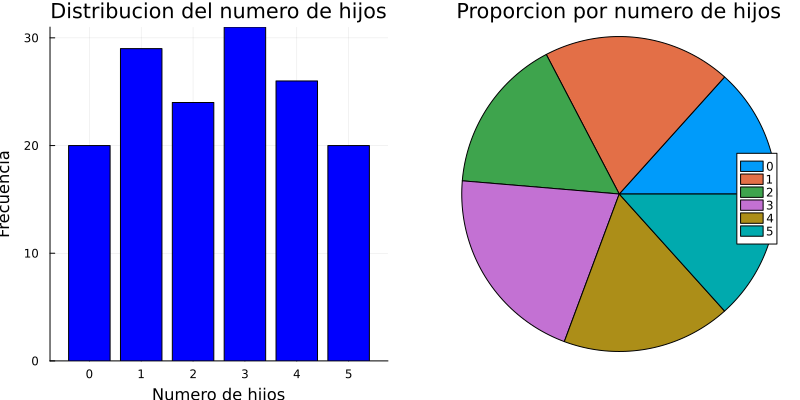

In [9]:
valores = 0:5
frecuencias = [sum(df.hijos .== i) for i in valores]

p1 = bar(valores, frecuencias,
        title="Distribucion del numero de hijos",
        xlabel="Numero de hijos", 
        ylabel="Frecuencia",
        color=:blue,
        legend=false)

p2 = pie(string.(valores), frecuencias,
        title="Proporcion por numero de hijos",
        legend=:right)

plot(p1, p2, layout=(1,2), size=(800,400))

In [10]:
println("INTERPRETACION:")
println("La distribucion del numero de hijos muestra que")
println("las familias tienen en promedio ", round(media_hijos, digits=2), " hijos.")
println("La cantidad mas comun es ", moda_hijos, " hijos por familia.")

INTERPRETACION:
La distribucion del numero de hijos muestra que
las familias tienen en promedio 2.49 hijos.
La cantidad mas comun es 3 hijos por familia.


In [11]:
media_ingreso = mean(df.ingreso)
mediana_ingreso = median(df.ingreso)
desv_std_ingreso = std(df.ingreso)
cv_ingreso = (desv_std_ingreso / media_ingreso) * 100

println("")
println("ANALISIS VARIABLE CONTINUA - INGRESO")
println("====================================")
println("Media: \$", round(media_ingreso, digits=2))  # Aquí se corrigió: \$ en lugar de $
println("Mediana: \$", round(mediana_ingreso, digits=2))
println("Desviacion estandar: \$", round(desv_std_ingreso, digits=2))
println("Coeficiente de variacion: ", round(cv_ingreso, digits=1), "%")
println("Minimo: \$", round(minimum(df.ingreso), digits=2))
println("Maximo: \$", round(maximum(df.ingreso), digits=2))
println("Rango: \$", round(maximum(df.ingreso) - minimum(df.ingreso), digits=2))


ANALISIS VARIABLE CONTINUA - INGRESO
Media: $2665.07
Mediana: $2603.13
Desviacion estandar: $1335.05
Coeficiente de variacion: 50.1%
Minimo: $531.97
Maximo: $4988.18
Rango: $4456.21


In [12]:
function calcular_cuartiles(data)
    sorted = sort(data)
    n = length(sorted)
    q1 = sorted[ceil(Int, 0.25 * n)]
    q2 = sorted[ceil(Int, 0.5 * n)]
    q3 = sorted[ceil(Int, 0.75 * n)]
    return q1, q2, q3
end

q1, q2, q3 = calcular_cuartiles(df.ingreso)
println("")
println("CUARTILES DEL INGRESO:")
println("Q1 (25%): \$", round(q1, digits=2))  # También aquí
println("Q2 (Mediana): \$", round(q2, digits=2))
println("Q3 (75%): \$", round(q3, digits=2))
println("Rango intercuartilico: \$", round(q3 - q1, digits=2))


CUARTILES DEL INGRESO:
Q1 (25%): $1478.46
Q2 (Mediana): $2591.49
Q3 (75%): $3833.86
Rango intercuartilico: $2355.4


In [13]:
println("")
println("INTERPRETACION:")
println("Los ingresos se distribuyen uniformemente entre \$500 y \$5000.")  # Y aquí
println("La media de \$", round(media_ingreso, digits=2), " indica el ingreso promedio.")
println("El coeficiente de variacion del ", round(cv_ingreso, digits=1), "%")
println("muestra una dispersion relativa alta de los datos.")


INTERPRETACION:
Los ingresos se distribuyen uniformemente entre $500 y $5000.
La media de $2665.07 indica el ingreso promedio.
El coeficiente de variacion del 50.1%
muestra una dispersion relativa alta de los datos.


In [14]:
categorias = niveles_educativos  
conteos = [sum(df.educacion .== cat) for cat in categorias]
porcentajes = [round((count/n)*100, digits=1) for count in conteos]

moda_educacion = calcular_moda(df.educacion)

println("")
println("ANALISIS VARIABLE CUALITATIVA - EDUCACION")
println("=========================================")
println("DISTRIBUCION POR NIVEL EDUCATIVO:")
for i in 1:length(categorias)
    println(categorias[i], ": ", conteos[i], " personas (", porcentajes[i], "%)")
end
println("Moda: ", moda_educacion)


ANALISIS VARIABLE CUALITATIVA - EDUCACION
DISTRIBUCION POR NIVEL EDUCATIVO:
Sin estudios: 33 personas (22.0%)
Primaria: 22 personas (14.7%)
Secundaria: 26 personas (17.3%)
Universidad: 36 personas (24.0%)
Posgrado: 33 personas (22.0%)
Moda: Universidad


In [15]:
println("")
println("ANALISIS CONJUNTO DE VARIABLES")
println("==============================")

categorias = niveles_educativos

println("INGRESO PROMEDIO POR EDUCACION:")
for cat in categorias
    mask = df.educacion .== cat
    ingreso_prom = mean(df.ingreso[mask])
    println(cat, ": \$", round(ingreso_prom, digits=2))
end

println("")
println("HIJOS PROMEDIO POR EDUCACION:")
for cat in categorias
    mask = df.educacion .== cat
    hijos_prom = mean(df.hijos[mask])
    println(cat, ": ", round(hijos_prom, digits=2), " hijos")
end


ANALISIS CONJUNTO DE VARIABLES
INGRESO PROMEDIO POR EDUCACION:
Sin estudios: $2670.57
Primaria: $3002.3
Secundaria: $2538.75
Universidad: $2758.59
Posgrado: $2432.24

HIJOS PROMEDIO POR EDUCACION:
Sin estudios: 2.76 hijos
Primaria: 2.5 hijos
Secundaria: 2.58 hijos
Universidad: 2.36 hijos
Posgrado: 2.3 hijos


In [19]:
println("╭──────────────────────────────────────────────────────────────╮")
println("│                                                              │")
println("│                   TALLER DE ESTADÍSTICA                      │")
println("│                                                              │")
println("│  🔍 Análisis de 150 casos                                    │")
println("│  📝 Tres variables diferentes                                │")
println("│  📊 Estadísticas descriptivas                                │")
println("│  📈 Visualizaciones gráficas                                 │")
println("│  💡 Interpretaciones claras                                  │")
println("│                                                              │")
println("│  Resultados: Distribuciones balanceadas y                    │")
println("│              relaciones entre variables                      │")
println("│                                                              │")
println("╰──────────────────────────────────────────────────────────────╯")

╭──────────────────────────────────────────────────────────────╮
│                                                              │
│                   TALLER DE ESTADÍSTICA                      │
│                                                              │
│  🔍 Análisis de 150 casos                                    │
│  📝 Tres variables diferentes                                │
│  📊 Estadísticas descriptivas                                │
│  📈 Visualizaciones gráficas                                 │
│  💡 Interpretaciones claras                                  │
│                                                              │
│  Resultados: Distribuciones balanceadas y                    │
│              relaciones entre variables                      │
│                                                              │
╰──────────────────────────────────────────────────────────────╯
